In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv("/Users/weilu/Research/server/april_2019/database/Q_iter3_with_rg_1ccr", index_col=0)
a = data.groupby("Run").apply(lambda grp: grp.nlargest(1, "index")).reset_index(drop=True)

In [79]:
pre = "/Users/weilu/Research/server/april_2019/database/"
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]
simulation_location_list = ["iter3_with_rg", "iter2_with_rg", "iter1_with_rg"]
pdb_list = dataset["combined"]
cluster_folder = "/Users/weilu/Research/server/april_2019/cluster_results/"
for simulation_location in simulation_location_list:
    for p in pdb_list:
        name = p.lower()[:4]
        targetFolder = f"{cluster_folder}{simulation_location}_{name}"
        os.system(f"mkdir -p {cluster_folder}{simulation_location}_{name}")
        data = pd.read_csv(f"{pre}/Q_{simulation_location}_{name}", index_col=0)
        a = data.groupby("Run").apply(lambda grp: grp.nlargest(1, "index")).reset_index(drop=True)
        for i, item in a.iterrows():
            # print(i)
            fileLocation = f"{pre}/{simulation_location}_{name}_{int(item['Run'])}/frame{int(item['index'])}.pdb"
            os.system(f"cp {fileLocation} {targetFolder}/run{i}.pdb")



In [90]:
%%time
all_data = []
for p in pdb_list:
    name = p.lower()[:4]
    for simulation_location in simulation_location_list:
        t1 = f"{cluster_folder}{simulation_location}_{name}"
        data = pd.read_csv(f"{pre}/Q_{simulation_location}_{name}", index_col=0)
        a = data.groupby("Run").apply(lambda grp: grp.nlargest(1, "index")).reset_index(drop=True)
        for i, item in a.iterrows():
            for simulation_location_2 in simulation_location_list:
                t2 = f"{cluster_folder}{simulation_location_2}_{name}"
                data2 = pd.read_csv(f"{pre}/Q_{simulation_location_2}_{name}", index_col=0)
                b = data2.groupby("Run").apply(lambda grp: grp.nlargest(1, "index")).reset_index(drop=True)
                for j, item2 in b.iterrows():
                    p1 = f"{t1}/run{i}.pdb"
                    p2 = f"{t2}/run{j}.pdb"
                    get_aligned_info(p1, p2)
                    all_data.append([name, simulation_location, i, simulation_location_2, j, aligned_length, rmsd, tmscore, seqid])
                    # break
        break
    break


CPU times: user 8.35 s, sys: 8.33 s, total: 16.7 s
Wall time: 1min 23s


In [147]:
plt.rcParams['figure.figsize'] = [16.18033, 10]

In [91]:
data = pd.DataFrame(all_data, columns=["protein", "sim1", "i", "sim2", "j", "aligned_length", "rmsd", "tmscore", "seqid"])
data.to_csv(f"{simulation_location}_{name}.csv")

In [ ]:
for simulation_location in simulation_location_list:
    for p in pdb_list:
        name = p.lower()[:4]
        targetFolder = f"{cluster_folder}{simulation_location}_{name}"
        os.system(f"mkdir -p {cluster_folder}{simulation_location}_{name}")
        for i, item in a.iterrows():
            # print(i)
            get_aligned_info(p1, p2)

In [35]:
simulation_location = "iter3_with_rg"
name = "1ccr"
cluster_folder = "/Users/weilu/Research/server/april_2019/cluster_results/"
targetFolder = f"{cluster_folder}{simulation_location}_{name}"
os.system(f"mkdir -p {cluster_folder}{simulation_location}_{name}")
for i, item in a.iterrows():
    # print(i)
    fileLocation = f"{pre}/{simulation_location}_{name}_{int(item['Run'])}/frame{int(item['index'])}.pdb"
    os.system(f"cp {fileLocation} {targetFolder}/run{i}.pdb")
    # print(f"cp {fileLocation} {cluster_folder}{simulation_location}_{name}/run{i}.pdb")


In [48]:
cmd = f"~/opt/TMalign/TMalign {targetFolder}/run0.pdb {targetFolder}/run1.pdb | grep -A 1 'Aligned'"
output = getFromTerminal(cmd)
print(output)

Aligned length= 77, RMSD=   4.05, Seq_ID=n_identical/n_aligned= 0.429
TM-score= 0.41428 (if normalized by length of Chain_1, i.e., LN=111, d0=3.88)



In [81]:
def get_aligned_info(p1, p2):
    cmd = f"~/opt/TMalign/TMalign {p1} {p2} | grep -A 1 'Aligned'"
    output = getFromTerminal(cmd)
    line = output.split("\n")[0]
    line2 = output.split("\n")[1]
    aligned_length,rmsd,seqid = line.split(",")
    aligned_length = int(aligned_length.split("=")[1])
    rmsd = float(rmsd.split("=")[1])
    tmscore = float(line2.split(",")[0].split("=")[-1].strip().split(" ")[0])
    seqid = float(seqid.split("=")[-1])
    # print("aligned_length, rmsd, tmscore, seqid")
    # print(aligned_length, rmsd, tmscore, seqid)

In [76]:
p1 = f"{targetFolder}/run0.pdb"
p2 = f"{targetFolder}/run1.pdb"
get_aligned_info(p1, p2)

aligned_length, rmsd, tmscore, seqid
77 4.05 0.41428 0.429


In [134]:
complete = pd.read_csv("/Users/weilu/Research/server/april_2019/cluster_apr12.csv", index_col=0)
complete["sim1_i"] = complete["sim1"] + "_" + complete["i"].astype(str)
complete["sim2_j"] = complete["sim2"] + "_" + complete["j"].astype(str)

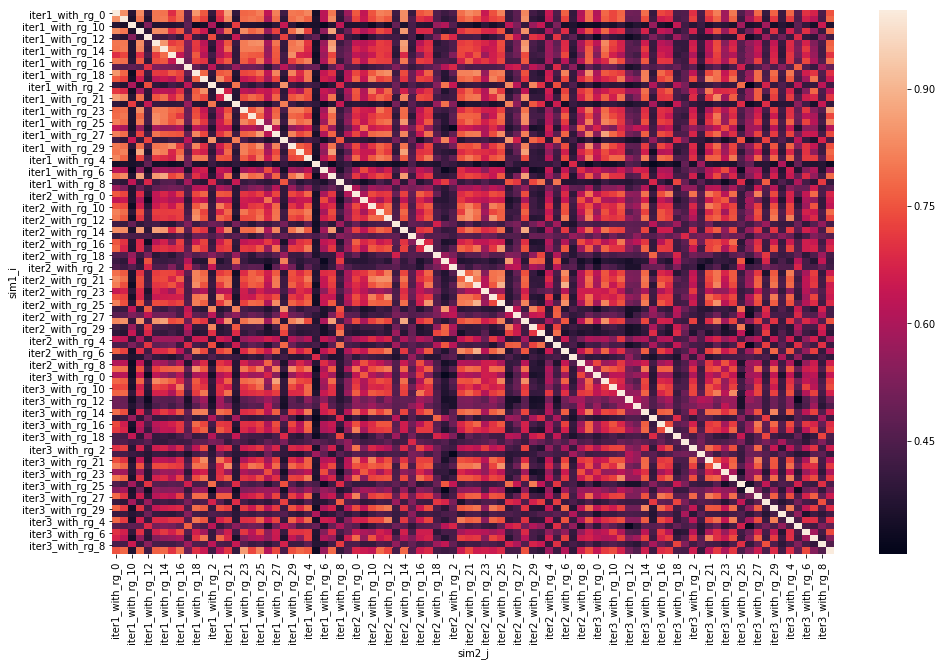

In [156]:
a = complete.query("protein == '1fc2'")
_table = a.pivot(index="sim1_i", columns="sim2_j", values="tmscore")
ax = sns.heatmap(_table)

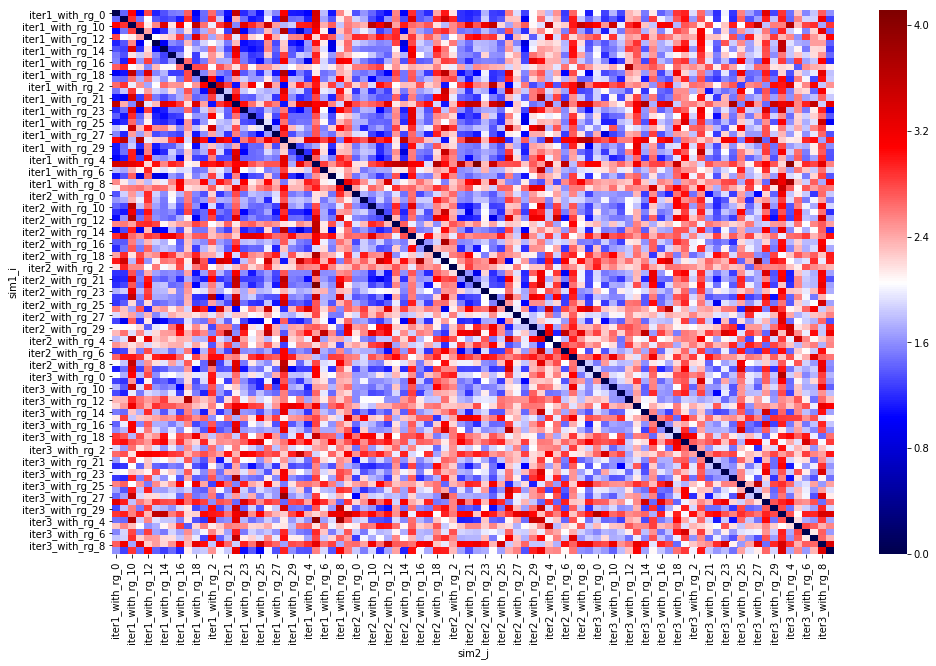

In [153]:
a = complete.query("protein == '1fc2'")
_table = a.pivot(index="sim1_i", columns="sim2_j", values="rmsd")
ax = sns.heatmap(_table, cmap="seismic")

In [165]:
info

,protein,length
0,1r69,63
1,1utg,70
2,3icb,75
3,256b,106
4,4cpv,108
5,1ccr,111
6,2mhr,118
7,1mba,146
8,2fha,172
9,1fc2,44


1r69
1utg
3icb
256b
4cpv
1ccr
2mhr
1mba
2fha
1fc2
1enh
2gb1
2cro
1ctf
4icb


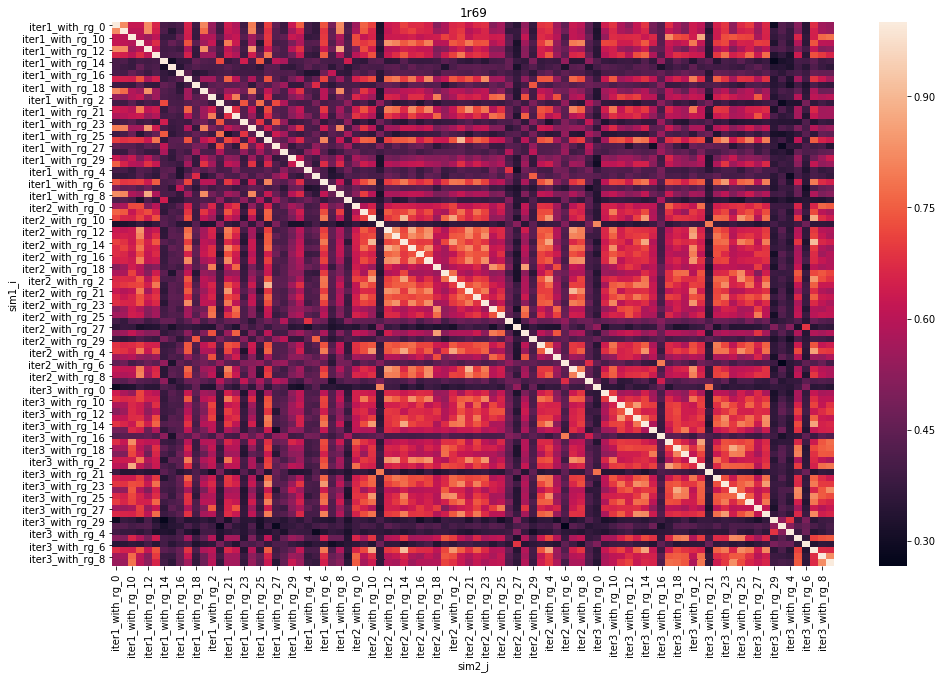

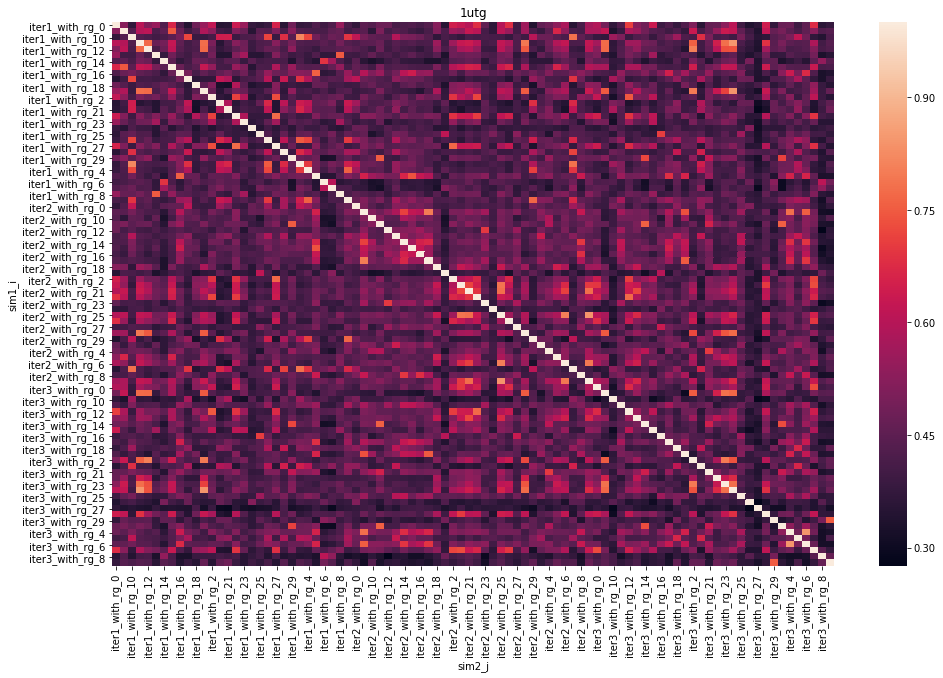

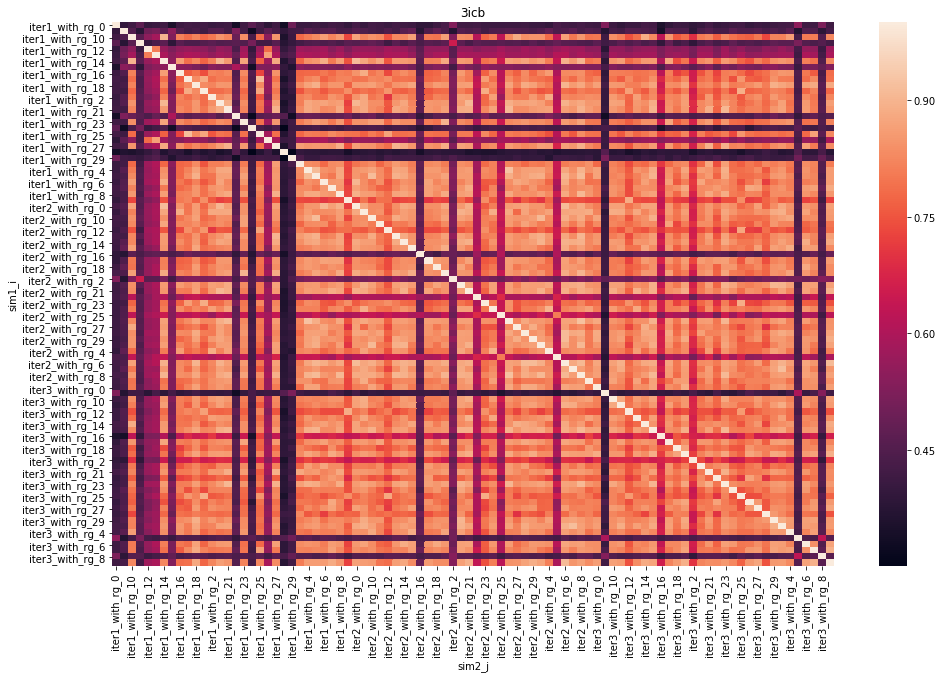

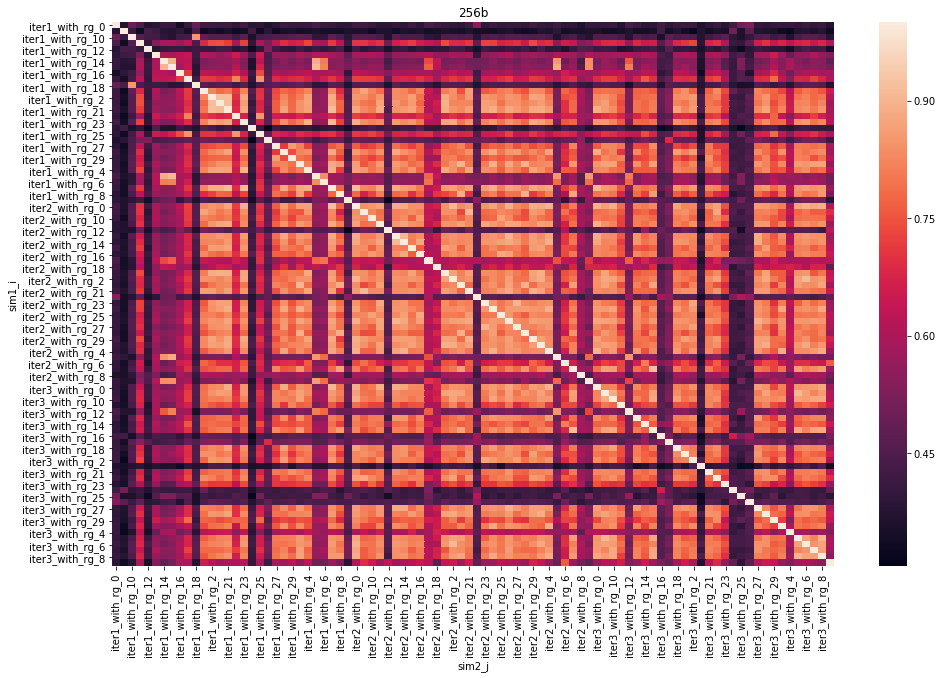

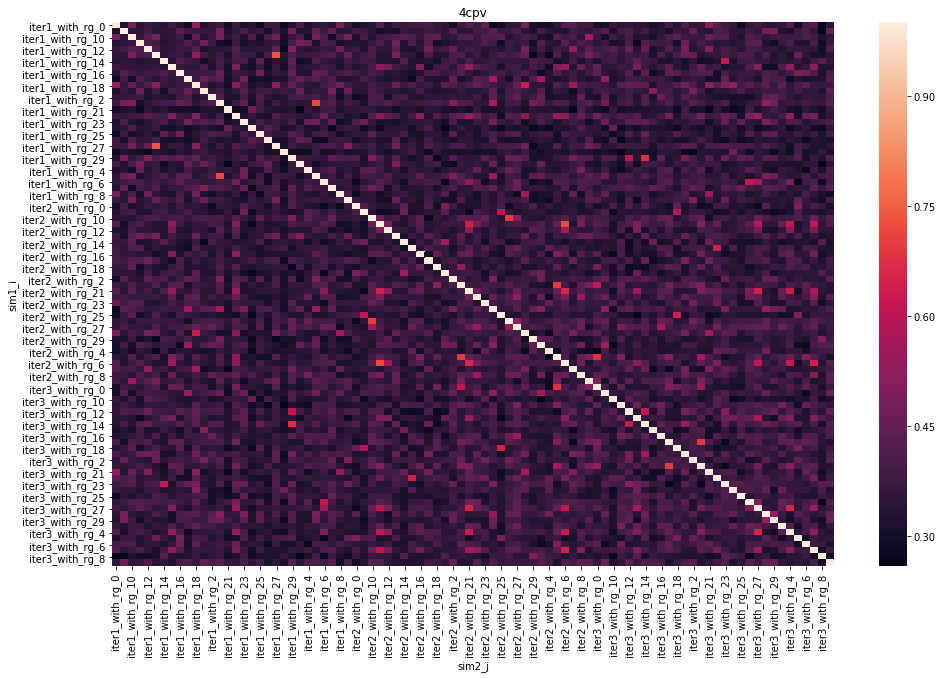

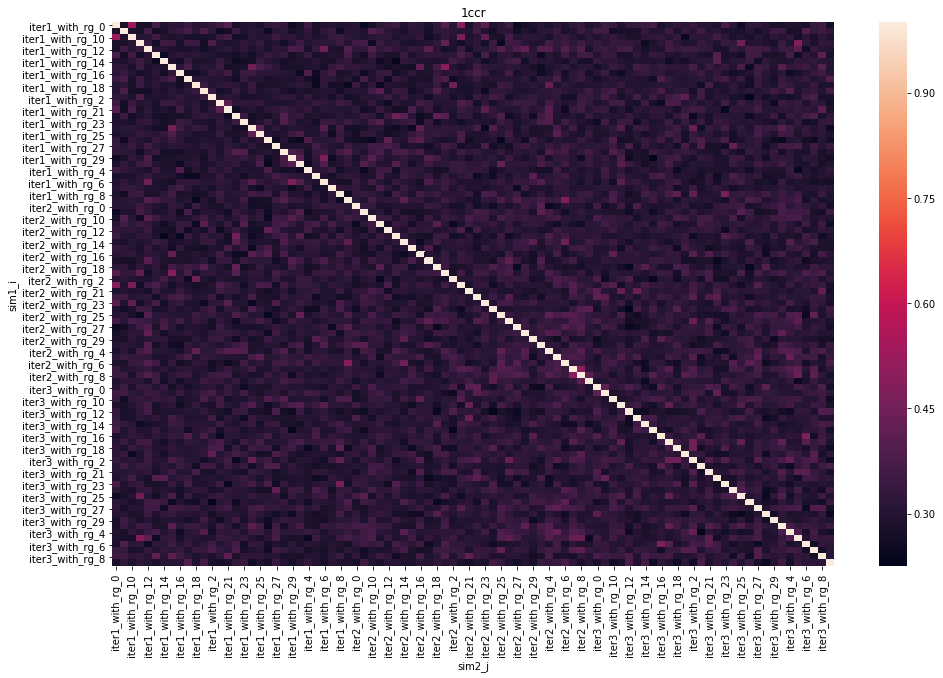

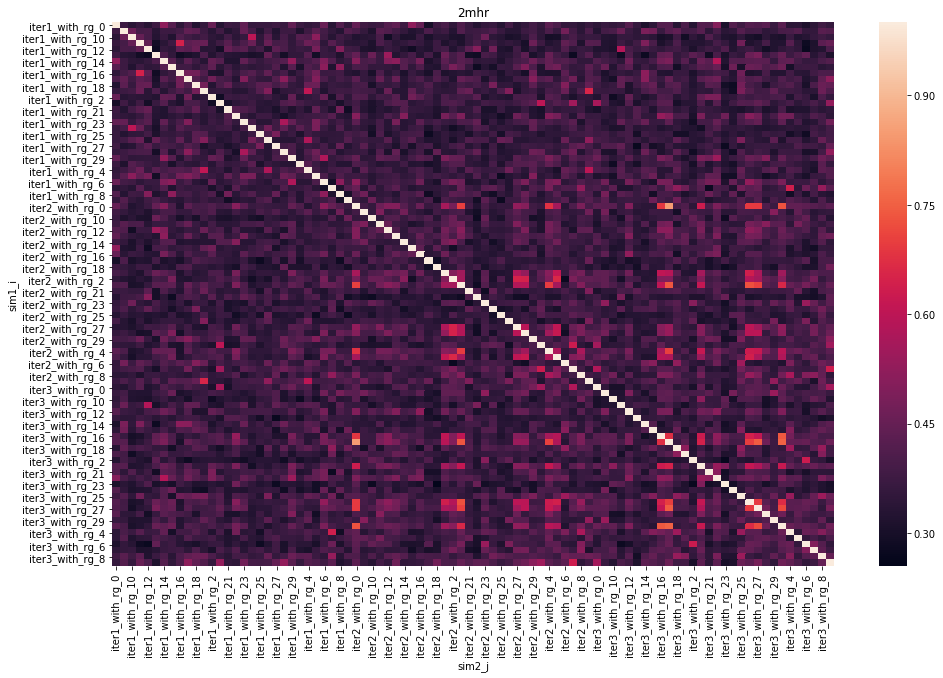

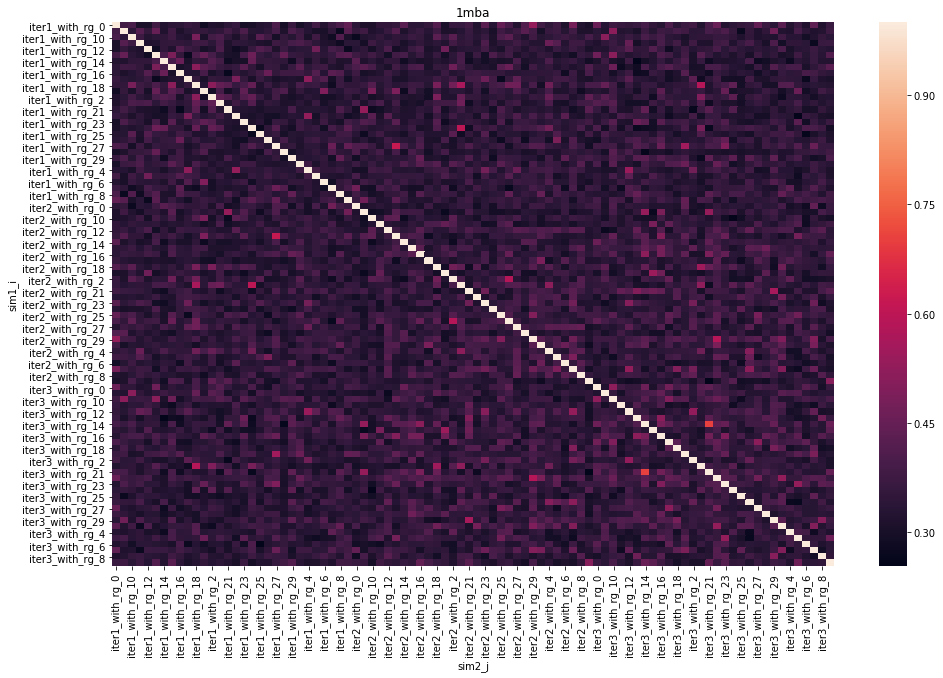

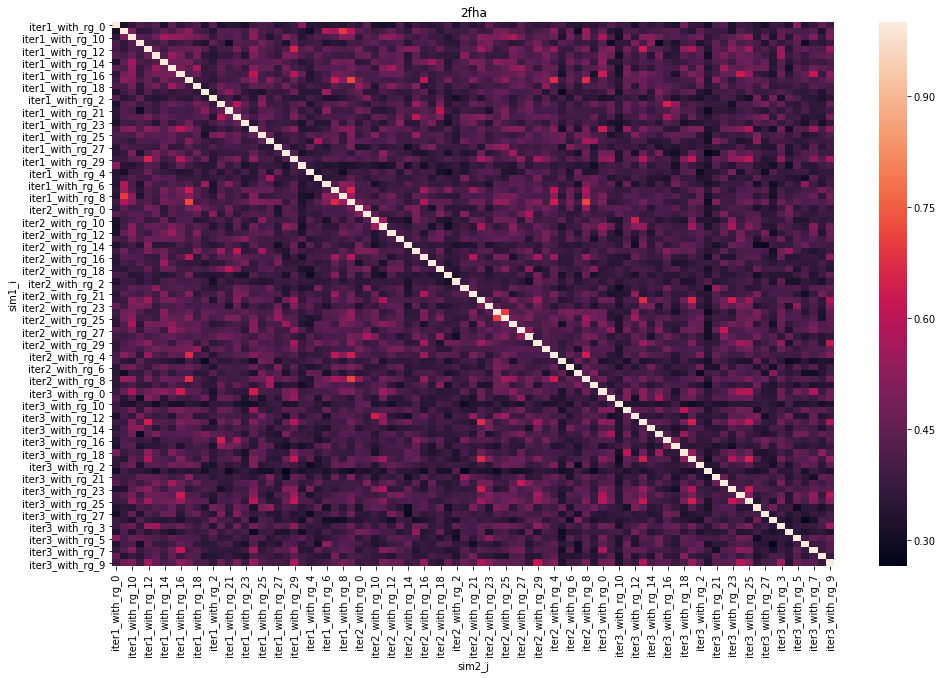

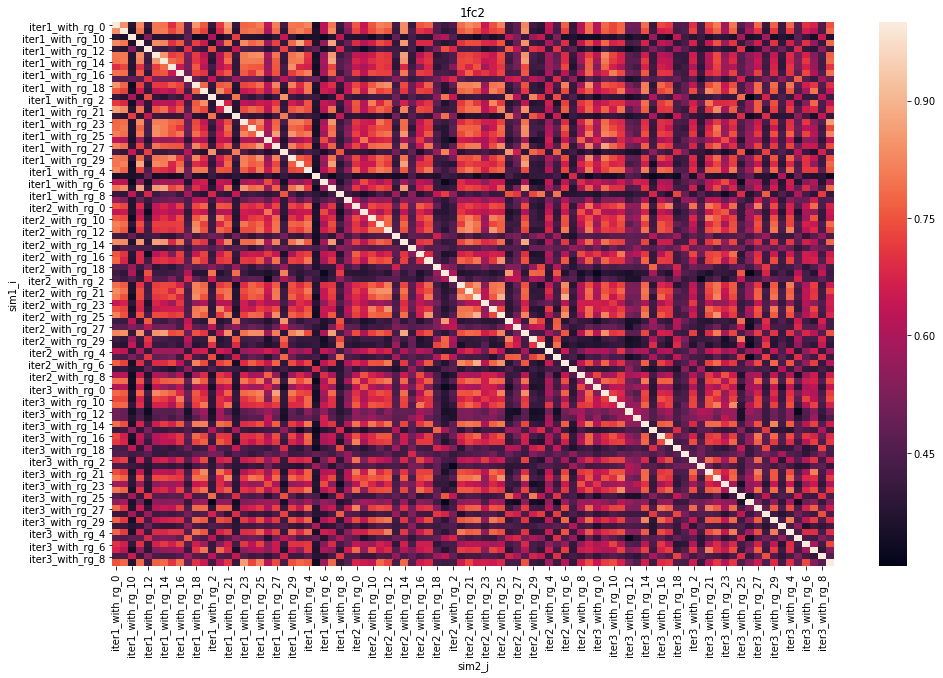

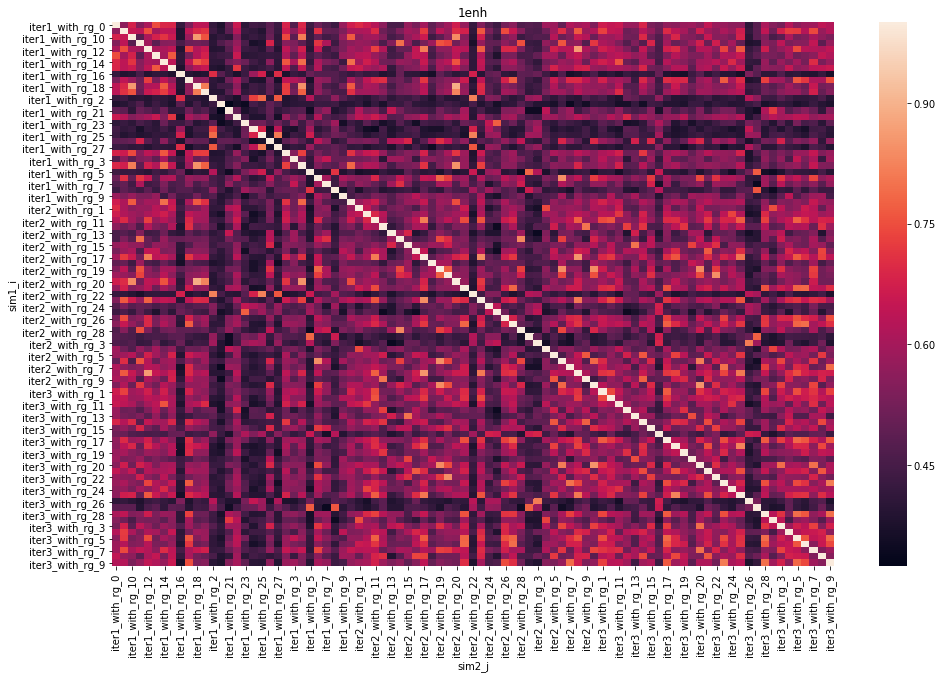

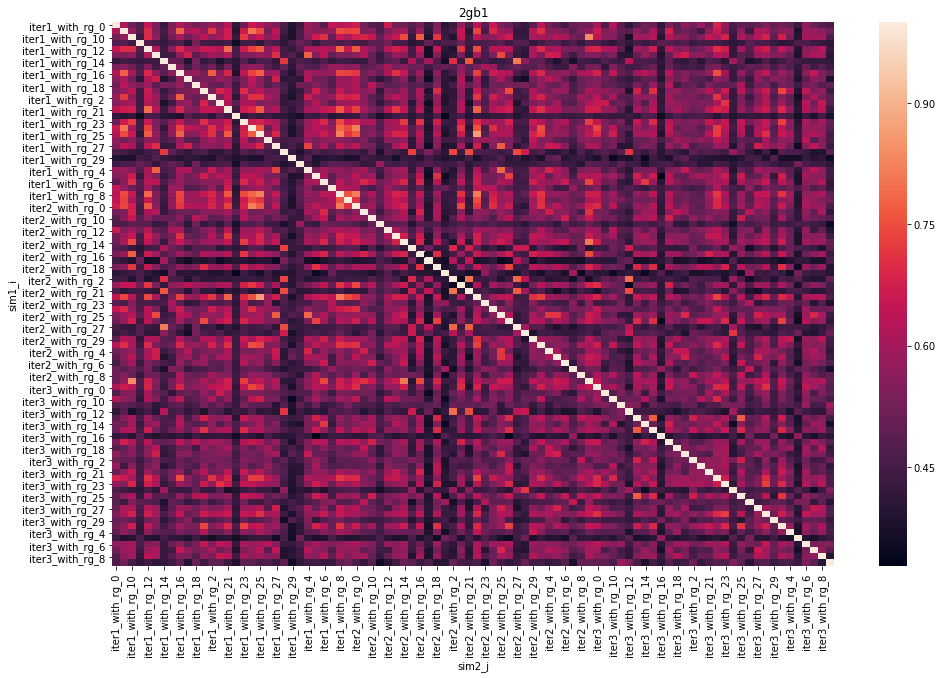

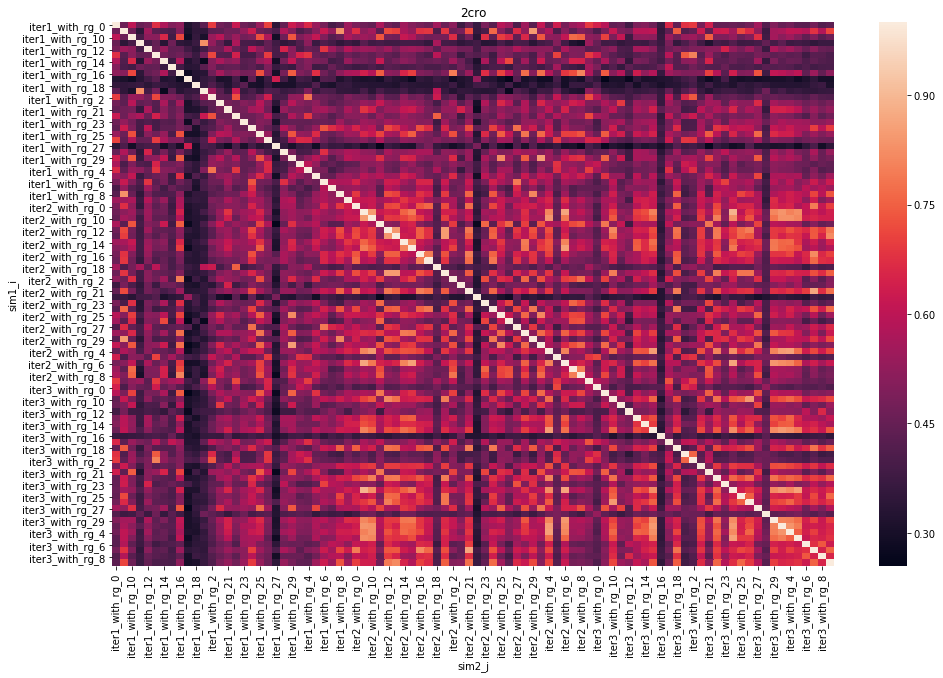

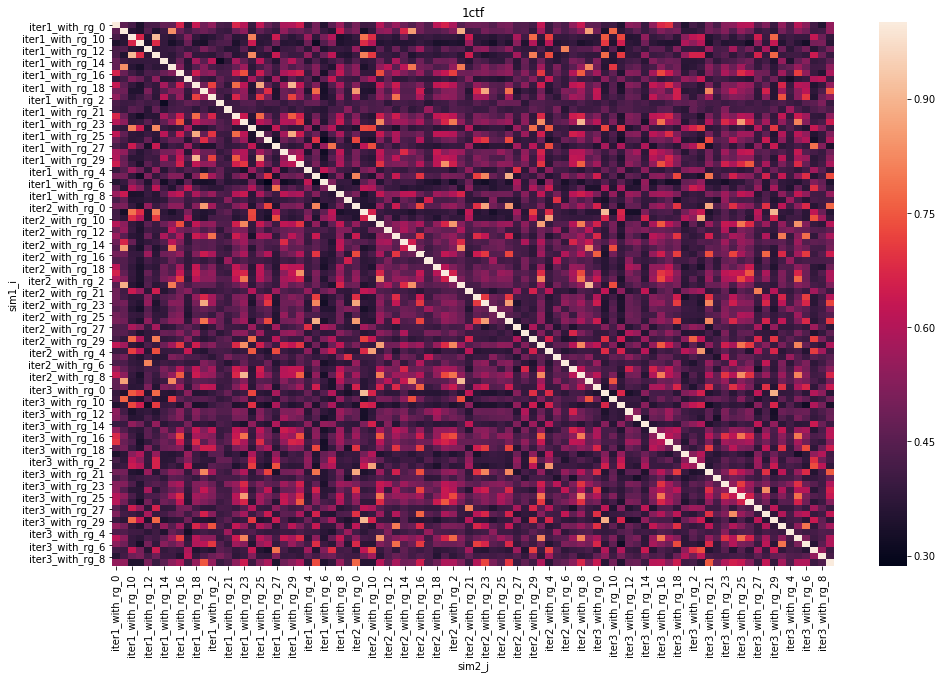

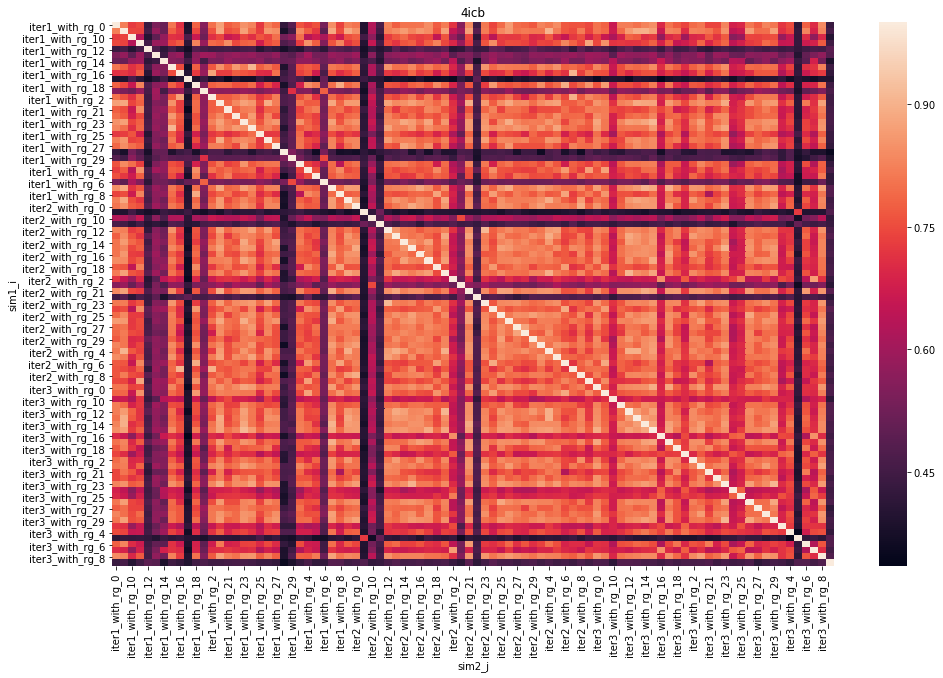

<Figure size 1164.98x720 with 0 Axes>

In [159]:
for p in pdb_list:
    name = p.lower()[:4]
    a = complete.query(f"protein == '{name}'")
    _table = a.pivot(index="sim1_i", columns="sim2_j", values="tmscore")
    print(name)
    ax = sns.heatmap(_table)
    ax.set_title(name+)
    plt.figure()

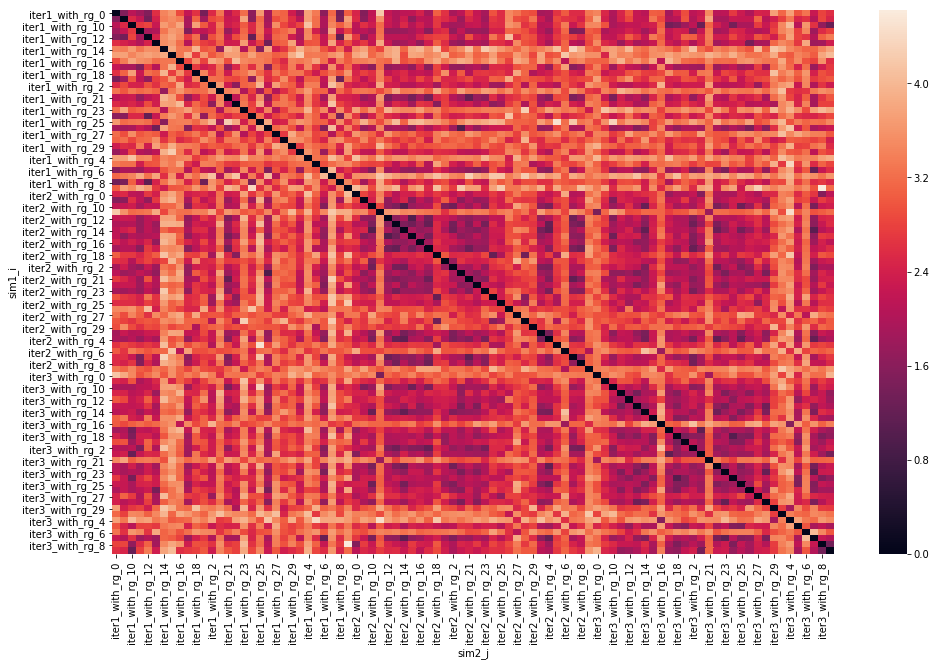

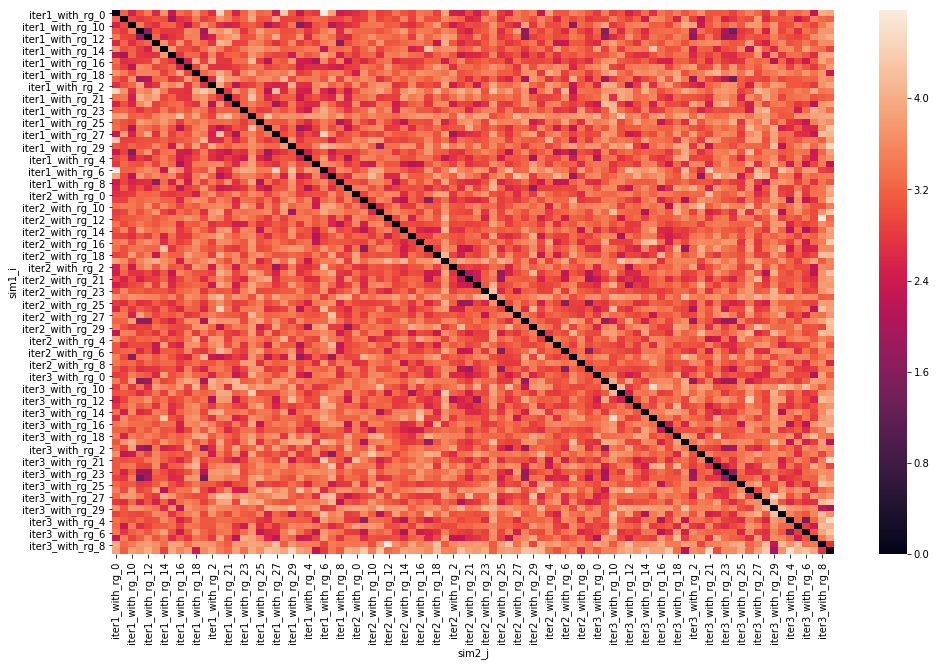

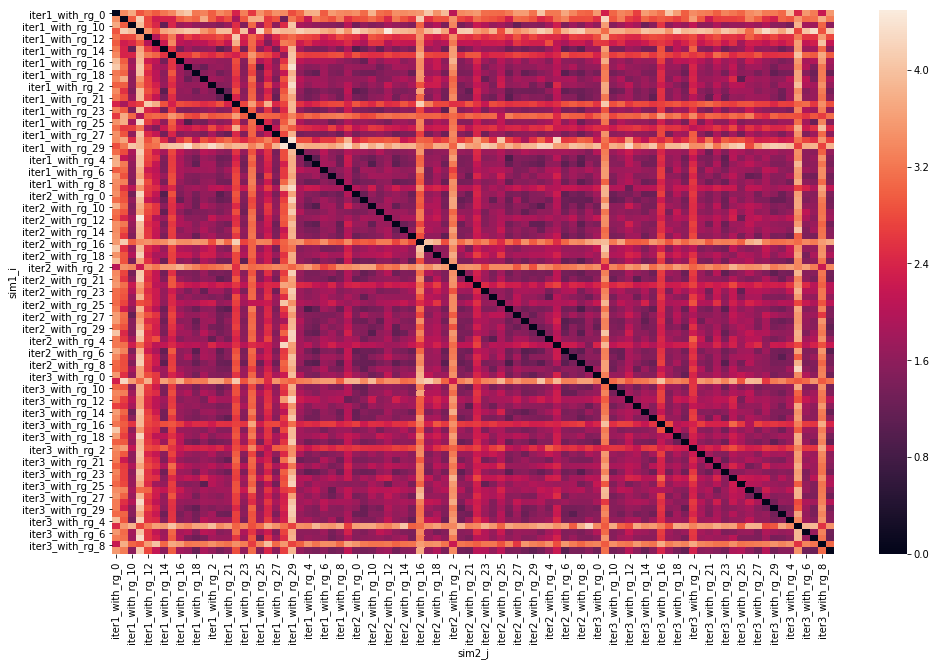

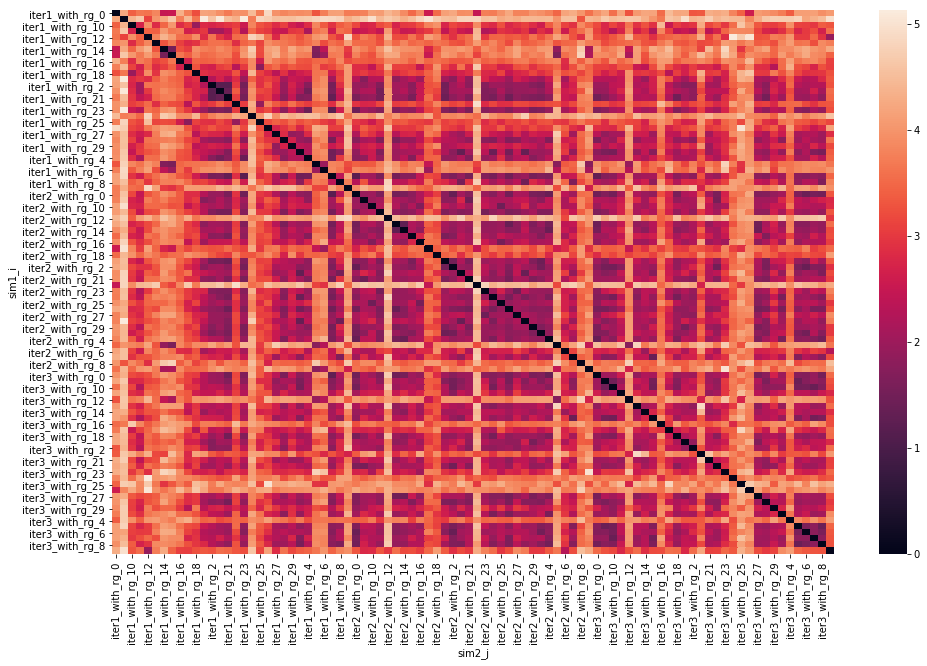

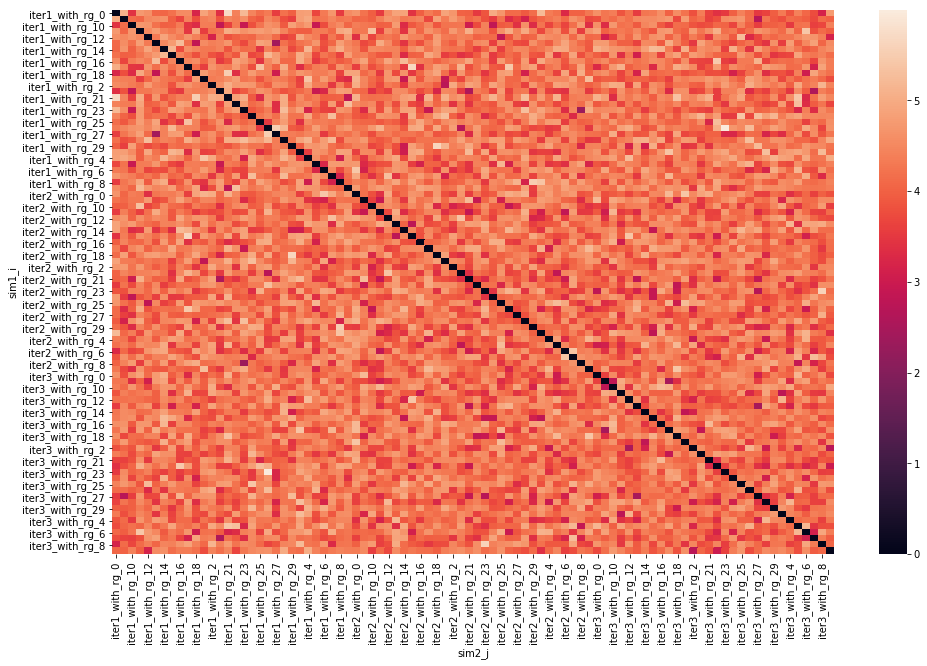

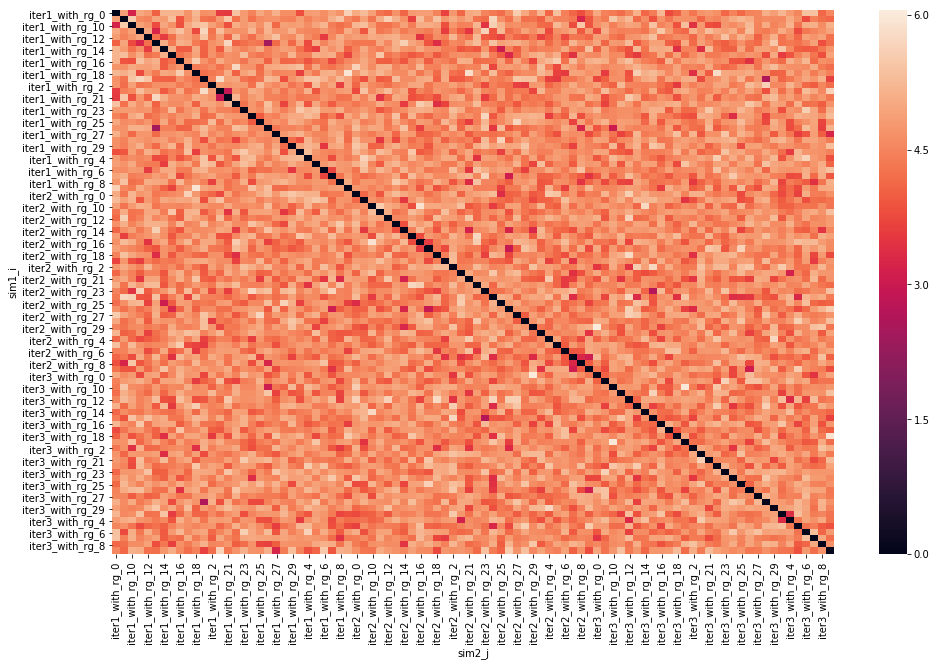

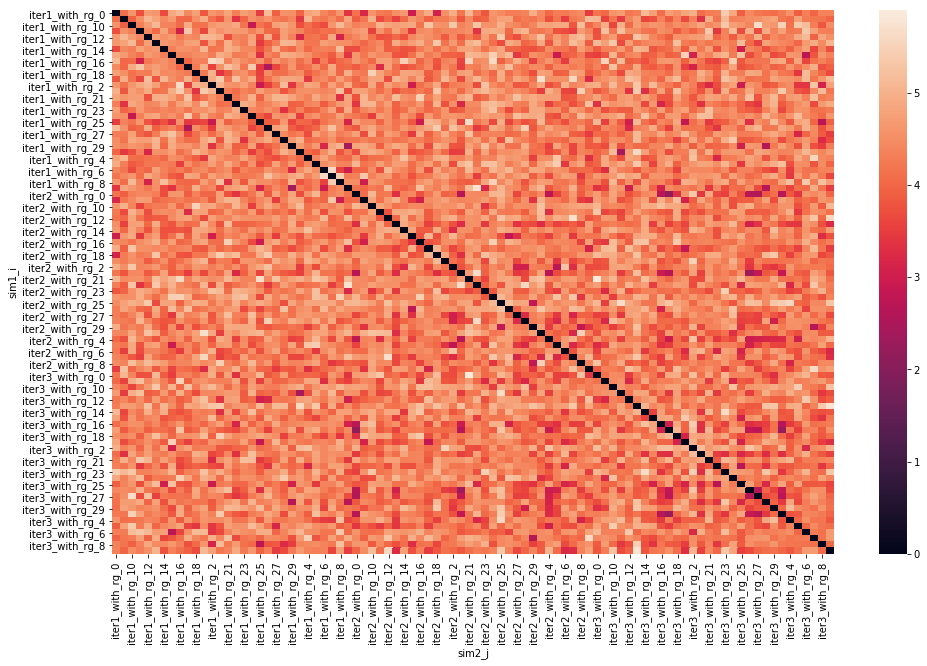

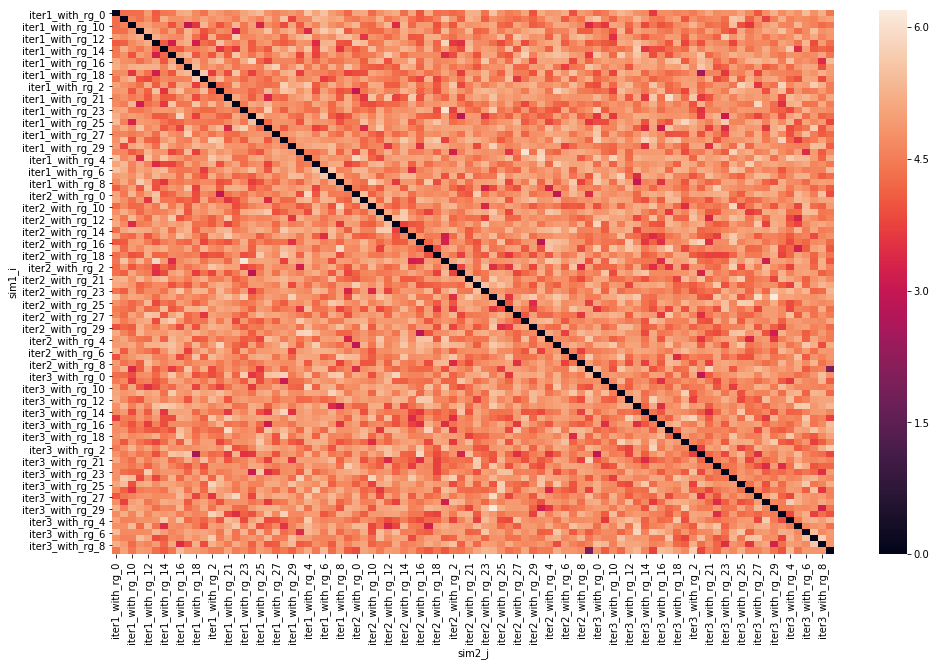

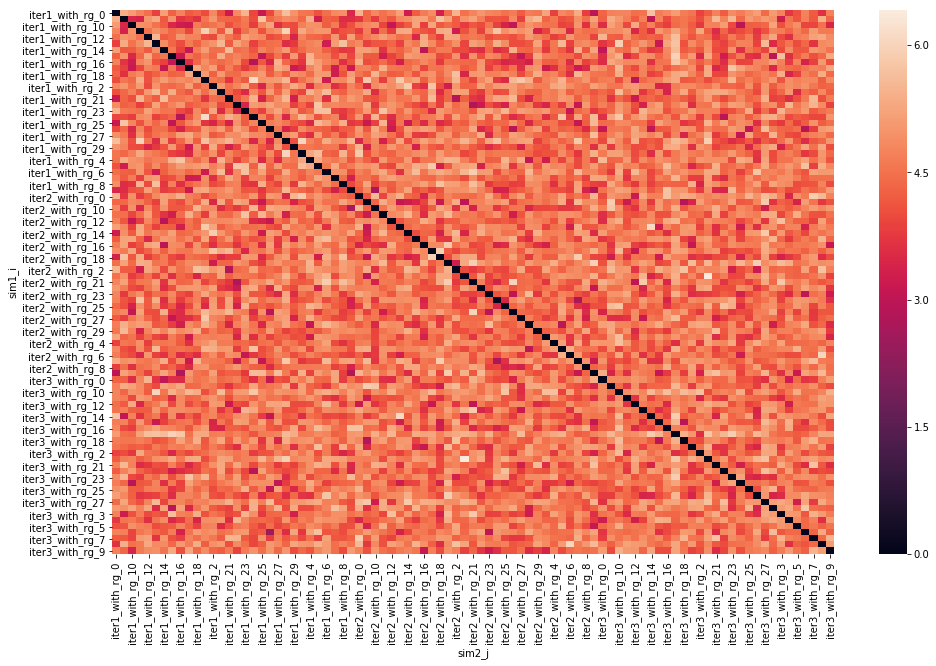

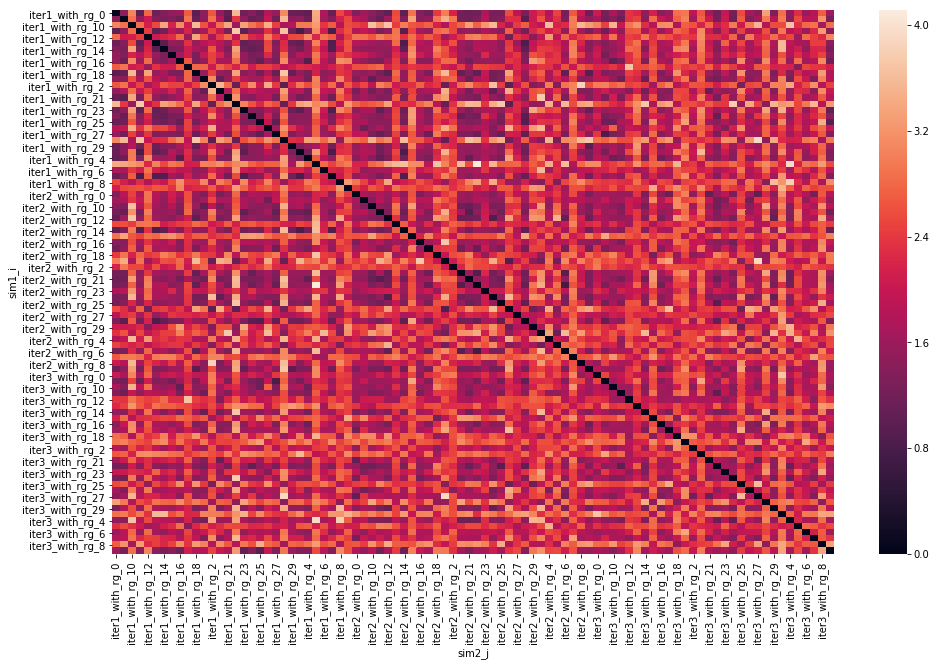

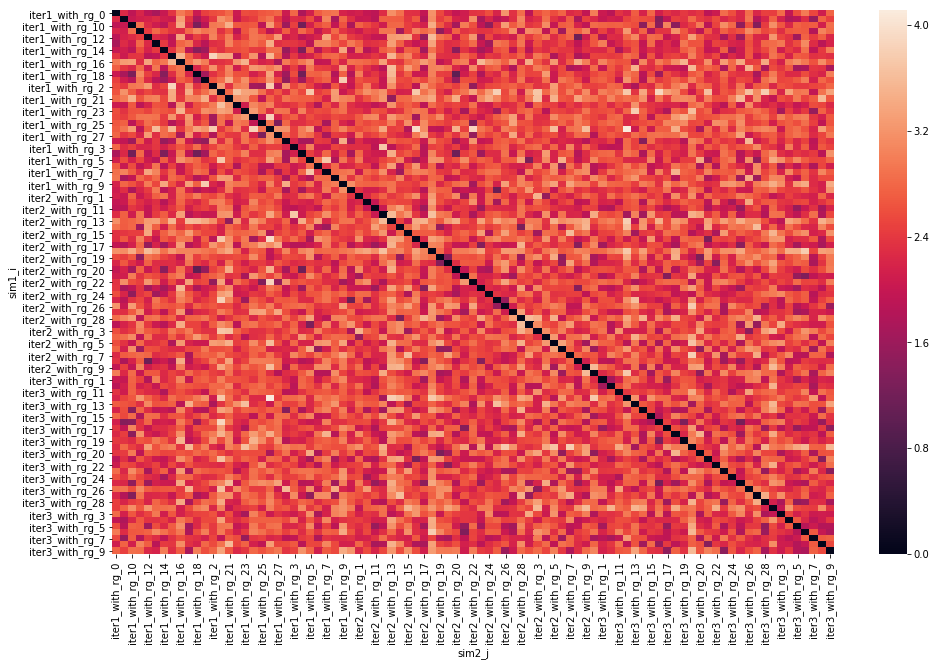

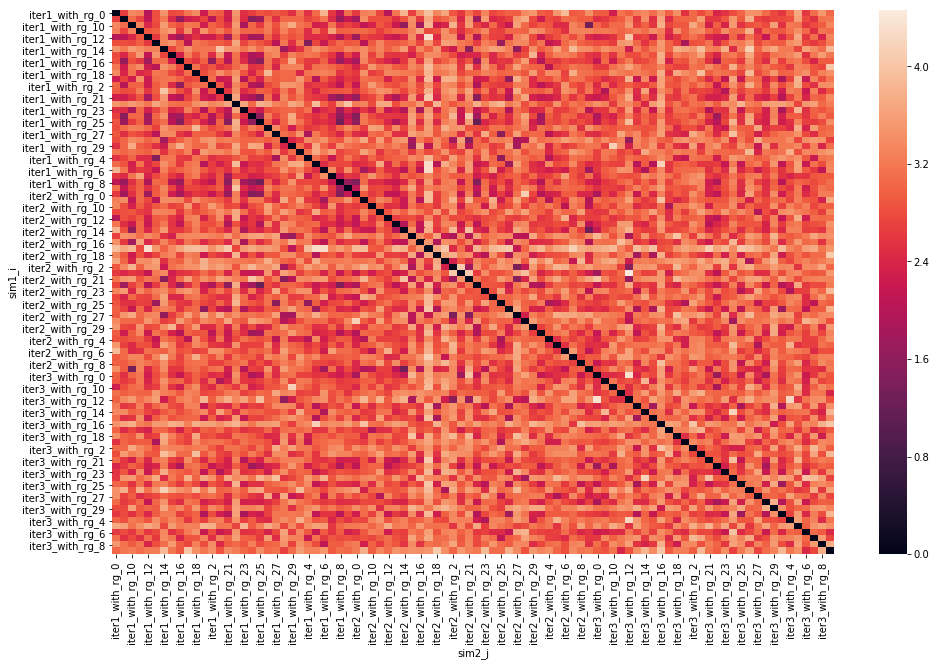

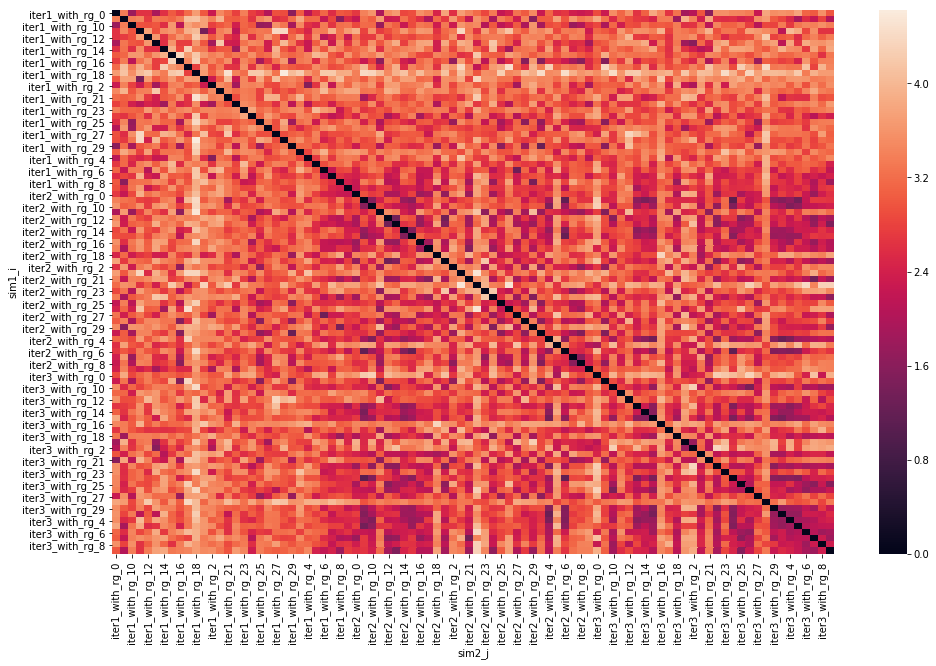

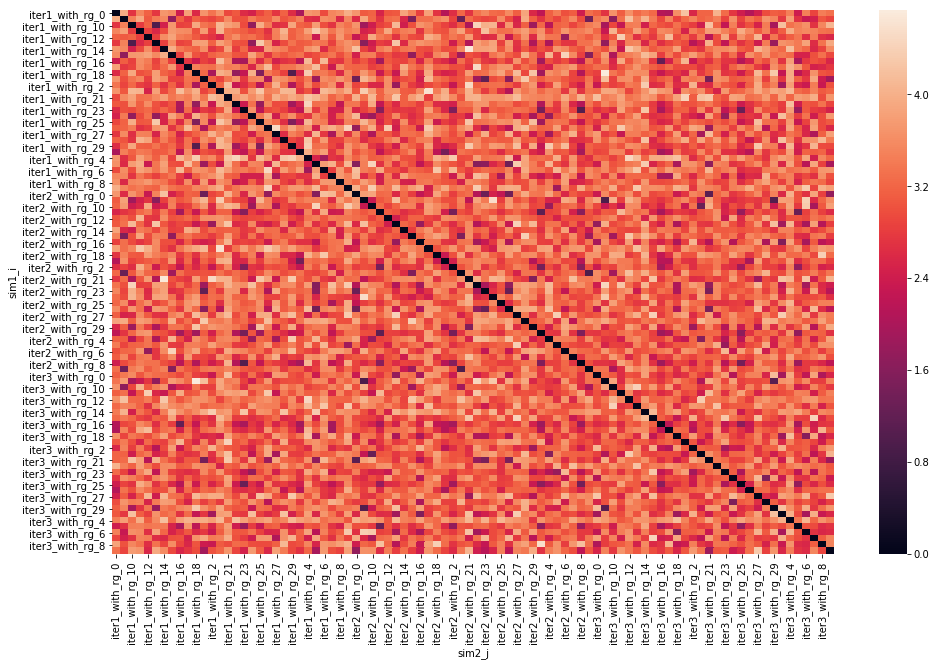

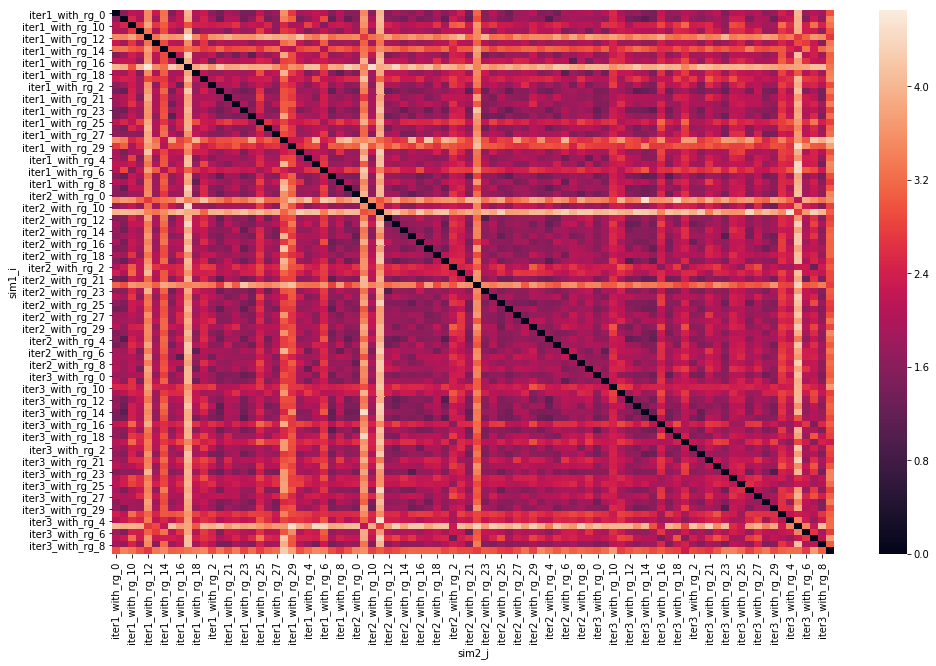

<Figure size 1164.98x720 with 0 Axes>

In [150]:
for p in pdb_list:
    name = p.lower()[:4]
    a = complete.query(f"protein == '{name}'")
    _table = a.pivot(index="sim1_i", columns="sim2_j", values="rmsd")
    ax = sns.heatmap(_table)
    plt.figure()

In [106]:
info = pd.read_csv("/Users/weilu/Research/library/training_set_length_info.csv", index_col=0)

In [95]:
import glob
a = glob.glob("/Users/weilu/Research/server/april_2019/cluster_results/*.csv")
dd = []
for f in a:
    tmp = pd.read_csv(f, index_col=0)
    dd.append(tmp)
# data.join(info.set_index("protein"), on="protein")

In [117]:
complete.to_csv("/Users/weilu/Research/server/april_2019/cluster_apr12.csv")